In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import xarray as xr
import numpy as np
import seaborn as sns

import matplotlib

pd.__version__
xr.__version__
np.__version__
sns.__version__

sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (15, 10)

# Causal graphs

In [2]:
import pickle

import cdt
import networkx as nx
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\envs\q2022\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Detecting 1 CUDA device(s).


In [3]:
import cdt.utils.Settings

cdt.utils.Settings.SETTINGS.get_default(rpath=None)
cdt.SETTINGS.rpath = "C:\\Program Files\\R\R-4.1.3\\bin\\Rscript"
cdt.utils.Settings.SETTINGS.get_default(rpath=None)

'Rscript'

'C:\\Program Files\\R\\R-4.1.3\\bin\\Rscript'

In [4]:
data = pd.read_pickle("all.pkl")
data = data[['aqr_stocks', 'aqr_bonds', 'aqr_comm', 'sbbi_stocks', 'sbbi_small_caps', 'sbbi_corp',
       'sbbi_govt_20', 'sbbi_govt_5', 'sbbi_rf', 'sbbi_corp_spreads', 'comm_ex_precious_metals']]

data = data.dropna()
data = data / data.std()
data_assets = data.copy()

In [5]:
data = pd.read_csv("adult.csv", header=None)
data_adult = data.copy()

In [6]:
data, graph = cdt.data.load_dataset('sachs')
data_sachs = data.copy()

In [7]:
data = data_assets.copy()

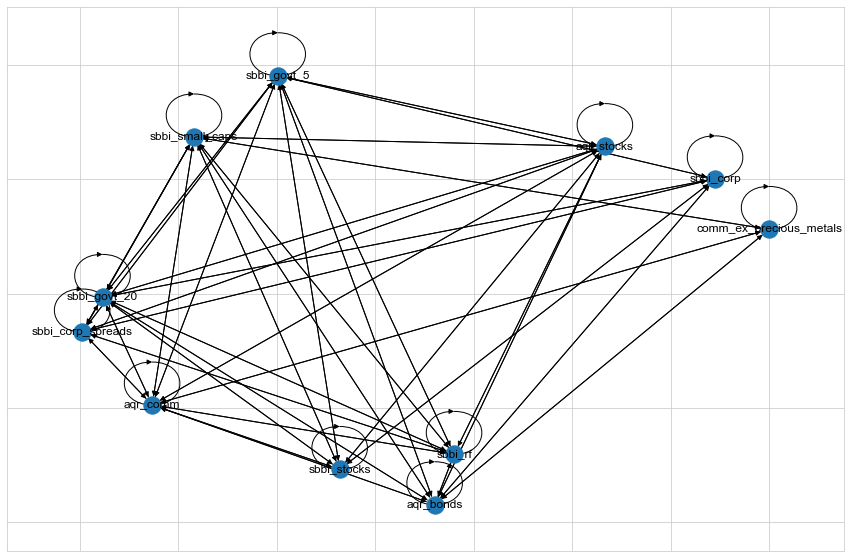

In [8]:
glasso = cdt.independence.graph.Glasso()
skeleton = glasso.predict(data)
nx.draw_networkx(skeleton)

In [9]:
pd.DataFrame(
    nx.adjacency_matrix(skeleton).todense(),
    index=skeleton.nodes,
    columns=skeleton.nodes,
).style.format('{:.2f}').background_gradient(axis=None)

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


,aqr_stocks,aqr_bonds,aqr_comm,sbbi_stocks,sbbi_small_caps,sbbi_corp,sbbi_govt_20,sbbi_govt_5,sbbi_rf,sbbi_corp_spreads,comm_ex_precious_metals
aqr_stocks,1.79,-0.18,-0.03,-0.95,-0.15,0.00,0.03,0.23,0.00,-0.23,0.00
aqr_bonds,-0.18,1.90,0.10,0.00,0.01,-0.32,-0.86,-0.16,0.14,0.00,0.02
aqr_comm,-0.03,0.10,8.42,-0.10,-0.15,0.00,0.03,-0.00,0.02,-0.01,-7.81
sbbi_stocks,-0.95,0.00,-0.10,3.66,-2.44,-0.05,-0.09,-0.09,0.00,0.00,0.00
sbbi_small_caps,-0.15,0.01,-0.15,-2.44,3.19,0.00,0.06,0.00,0.03,-0.09,-0.10
sbbi_corp,0.00,-0.32,0.00,-0.05,0.00,27.25,-21.70,-0.51,0.00,-14.83,0.00
sbbi_govt_20,0.03,-0.86,0.03,-0.09,0.06,-21.70,20.96,-1.94,-0.00,12.10,0.00
sbbi_govt_5,0.23,-0.16,-0.00,-0.09,0.00,-0.51,-1.94,3.04,-0.07,0.07,0.00
sbbi_rf,0.00,0.14,0.02,0.00,0.03,0.00,-0.00,-0.07,1.02,0.04,0.00
sbbi_corp_spreads,-0.23,0.00,-0.01,0.00,-0.09,-14.83,12.10,0.07,0.04,9.20,0.00


In [10]:
data.corr().style.format('{:.2f}').background_gradient(axis=None)

,aqr_stocks,aqr_bonds,aqr_comm,sbbi_stocks,sbbi_small_caps,sbbi_corp,sbbi_govt_20,sbbi_govt_5,sbbi_rf,sbbi_corp_spreads,comm_ex_precious_metals
aqr_stocks,1.00,0.09,0.21,0.65,0.57,0.13,-0.04,-0.07,-0.06,0.29,0.19
aqr_bonds,0.09,1.00,-0.11,0.10,0.05,0.62,0.67,0.58,-0.11,0.11,-0.11
aqr_comm,0.21,-0.11,1.00,0.28,0.31,-0.04,-0.10,-0.07,-0.03,0.08,0.95
sbbi_stocks,0.65,0.10,0.28,1.00,0.83,0.19,0.07,0.06,-0.06,0.23,0.27
sbbi_small_caps,0.57,0.05,0.31,0.83,1.00,0.14,0.00,0.01,-0.07,0.24,0.30
sbbi_corp,0.13,0.62,-0.04,0.19,0.14,1.00,0.82,0.71,-0.06,0.55,-0.04
sbbi_govt_20,-0.04,0.67,-0.10,0.07,0.00,0.82,1.00,0.82,-0.02,-0.02,-0.09
sbbi_govt_5,-0.07,0.58,-0.07,0.06,0.01,0.71,0.82,1.00,-0.00,0.04,-0.07
sbbi_rf,-0.06,-0.11,-0.03,-0.06,-0.07,-0.06,-0.02,-0.00,1.00,-0.07,-0.03
sbbi_corp_spreads,0.29,0.11,0.08,0.23,0.24,0.55,-0.02,0.04,-0.07,1.00,0.07


adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


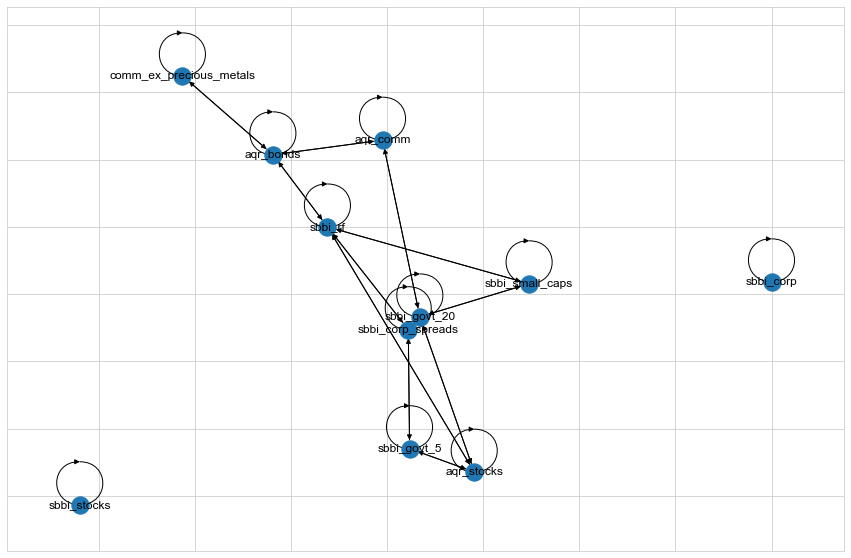

In [11]:
new_skeleton = cdt.utils.graph.remove_indirect_links(skeleton, alg='aracne')
nx.draw_networkx(new_skeleton)

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


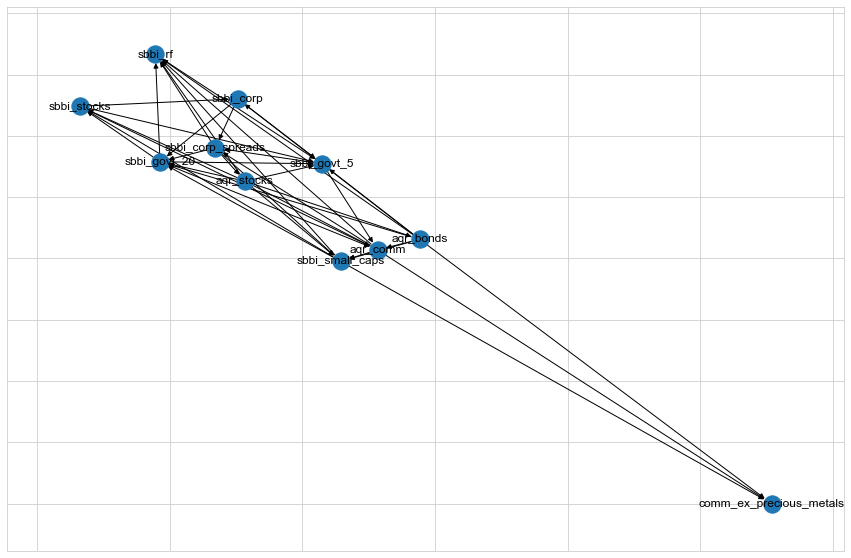

In [12]:
model = cdt.causality.graph.PC()
#model = cdt.causality.graph.GES()
#model = cdt.causality.graph.GIES()
output_graph = model.predict(data, skeleton) # new_skeleton)
nx.draw_networkx(output_graph)

In [13]:
adjacency_matrix = nx.adjacency_matrix(output_graph).todense()
adjacency_matrix = pd.DataFrame(adjacency_matrix, columns=output_graph.nodes(), index=output_graph.nodes())
adjacency_matrix

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


,aqr_stocks,aqr_bonds,aqr_comm,sbbi_stocks,sbbi_small_caps,sbbi_corp,sbbi_govt_20,sbbi_govt_5,sbbi_rf,sbbi_corp_spreads,comm_ex_precious_metals
aqr_stocks,0,1,1,1,1,0,1,1,1,0,0
aqr_bonds,0,0,1,0,1,1,1,1,1,0,1
aqr_comm,0,0,0,1,1,0,0,0,1,1,1
sbbi_stocks,0,0,0,0,0,1,0,1,0,0,0
sbbi_small_caps,0,0,0,1,0,0,1,0,1,0,1
sbbi_corp,0,0,0,0,0,0,1,1,0,1,0
sbbi_govt_20,0,0,1,1,0,0,0,1,1,0,0
sbbi_govt_5,0,0,1,0,0,0,0,0,0,1,0
sbbi_rf,0,0,0,0,0,0,0,1,0,0,0
sbbi_corp_spreads,1,0,0,0,1,0,1,0,1,0,0


In [14]:
model = cdt.causality.graph.LiNGAM()
try:
    output_graph = model.predict(data)
    nx.draw_networkx(output_graph)
except:
    print("failed")


R Python Error Output 
-----------------------

[Errno 2] No such file or directory: 'C:\\Users\\Andreas\\AppData\\Local\\Temp\\cdt_lingam_bb220150-9ec3-422a-ad5f-1e8a98afdac9\\result.csv'
failed


# R

In [4]:
import os
os.environ["R_HOME"] = "C:\\Program Files\\R\\R-4.1.3\\"

In [5]:
import os
import rpy2
from rpy2.robjects import r

In [6]:
%load_ext rpy2.ipython

C:\ProgramData\Anaconda3\envs\q2022\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [ ]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects.conversion import localconverter

In [10]:
%Rdevice png
import rpy2.ipython.html
rpy2.ipython.html.init_printing()

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [39]:
import rpy2.situation
[print(row) for row in rpy2.situation.iter_info()];

rpy2 version:
3.4.5
Python version:
3.9.11 (main, Mar 30 2022, 02:45:55) [MSC v.1916 64 bit (AMD64)]
Looking for R's HOME:
    Environment variable R_HOME: C:\Program Files\R\R-4.1.3\
    InstallPath in the registry: C:\Program Files\R\R-4.1.3
    Environment variable R_USER: None
    Environment variable R_LIBS_USER: None
R version:
    In the PATH: 
    Loading R library from rpy2: OK
Additional directories to load R packages from:
None
C extension compilation:


In [25]:
%R .libPaths()
%R R.home()
%R Sys.getenv('R_HOME')

'C:/Program Files/R/R-4.1.3/library'


'C:/Program Files/R/R-4.1.3/'


'C:/Program Files/R/R-4.1.3/'


In [24]:
%%R
R.version.string

[1] "R version 4.1.3 (2022-03-10)"


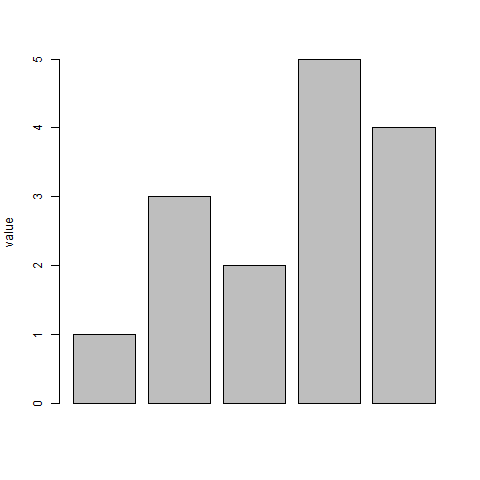

In [23]:
%%R
barplot(c(1,3,2,5,4), ylab="value")

In [28]:
data = pd.read_pickle("all.pkl")
cols = ['gold', 'silver', 'aqr_stocks', 'aqr_bonds', 'aqr_comm',
       'sbbi_stocks', 'sbbi_small_caps', 'sbbi_corp', 'sbbi_govt_20',
       'sbbi_govt_5', 'sbbi_rf']
data = data.dropna()[cols]

sorted(np.linalg.eig(data.corr())[0])
data.shape

[0.12535143329114543,
 0.1578940796528719,
 0.261877744662402,
 0.3892053899819116,
 0.42474475172639126,
 0.49681543764403024,
 0.7421123169661688,
 1.0015335449217553,
 1.6042014986952013,
 2.5933991819956246,
 3.202864620462508]

(1126, 11)

In [32]:
%%R -i data -o res_ -o A_
#library(Matrix)
#c_ = cor(df_)
#c_ = nearPD(c_, corr=TRUE)$mat
res_ = TMFG(data)
A_ = res_$A
A_
#separators_ = res_$separators
#cliques_ = res_$cliques

#res_

            [,1]      [,2]      [,3]        [,4]      [,5]        [,6]
 [1,] 1.00000000 0.5560377 0.0000000  0.00000000 0.2697562  0.02711976
 [2,] 0.55603772 1.0000000 0.1247503  0.00000000 0.2820548  0.10140092
 [3,] 0.00000000 0.1247503 1.0000000  0.00000000 0.2056793  0.64706374
 [4,] 0.00000000 0.0000000 0.0000000  1.00000000 0.0000000  0.10285881
 [5,] 0.26975616 0.2820548 0.2056793  0.00000000 1.0000000  0.28295267
 [6,] 0.02711976 0.1014009 0.6470637  0.10285881 0.2829527  1.00000000
 [7,] 0.00000000 0.0000000 0.5692851  0.05166978 0.3088535  0.83299697
 [8,] 0.00000000 0.0000000 0.1296759  0.62480944 0.0000000  0.18514059
 [9,] 0.00000000 0.0000000 0.0000000  0.67455410 0.0000000  0.06569656
[10,] 0.00000000 0.0000000 0.0000000  0.58132973 0.0000000  0.00000000
[11,] 0.00000000 0.0000000 0.0000000 -0.11300056 0.0000000 -0.06231779
             [,7]      [,8]       [,9]     [,10]       [,11]
 [1,]  0.00000000 0.0000000 0.00000000 0.0000000  0.00000000
 [2,]  0.00000000 0.000000

In [36]:
res_[0]

array([[ 9,  8, 10,  4],
       [ 9,  8,  4,  6],
       [ 8,  4,  6,  7],
       [ 8,  6,  7,  3],
       [ 6,  7,  3,  5],
       [ 6,  3,  5,  2],
       [ 6,  5,  2,  1],
       [ 4,  6,  7, 11]], dtype=int32)

In [40]:
nt = importr("NetworkToolbox")

a = nt.TMFG(data)

In [46]:
c1 = pd.DataFrame(a[0], index=data.columns, columns=data.columns)
c1.style.background_gradient(axis=None)

c2 = data.corr()
c2.style.background_gradient(axis=None)

,gold,silver,aqr_stocks,aqr_bonds,aqr_comm,sbbi_stocks,sbbi_small_caps,sbbi_corp,sbbi_govt_20,sbbi_govt_5,sbbi_rf
gold,1.000000,0.556038,0.000000,0.000000,0.269756,0.027120,0.000000,0.000000,0.000000,0.000000,0.000000
silver,0.556038,1.000000,0.124750,0.000000,0.282055,0.101401,0.000000,0.000000,0.000000,0.000000,0.000000
aqr_stocks,0.000000,0.124750,1.000000,0.000000,0.205679,0.647064,0.569285,0.129676,0.000000,0.000000,0.000000
aqr_bonds,0.000000,0.000000,0.000000,1.000000,0.000000,0.102859,0.051670,0.624809,0.674554,0.581330,-0.113001
aqr_comm,0.269756,0.282055,0.205679,0.000000,1.000000,0.282953,0.308854,0.000000,0.000000,0.000000,0.000000
sbbi_stocks,0.027120,0.101401,0.647064,0.102859,0.282953,1.000000,0.832997,0.185141,0.065697,0.000000,-0.062318
sbbi_small_caps,0.000000,0.000000,0.569285,0.051670,0.308854,0.832997,1.000000,0.137000,0.000000,0.000000,-0.065831
sbbi_corp,0.000000,0.000000,0.129676,0.624809,0.000000,0.185141,0.137000,1.000000,0.824660,0.711366,0.000000
sbbi_govt_20,0.000000,0.000000,0.000000,0.674554,0.000000,0.065697,0.000000,0.824660,1.000000,0.823471,0.000000
sbbi_govt_5,0.000000,0.000000,0.000000,0.581330,0.000000,0.000000,0.000000,0.711366,0.823471,1.000000,0.000000


,gold,silver,aqr_stocks,aqr_bonds,aqr_comm,sbbi_stocks,sbbi_small_caps,sbbi_corp,sbbi_govt_20,sbbi_govt_5,sbbi_rf
gold,1.000000,0.556038,0.015234,0.023805,0.269756,0.027120,0.034233,0.051033,0.029284,0.059190,0.003441
silver,0.556038,1.000000,0.124750,-0.074641,0.282055,0.101401,0.089029,-0.060158,-0.108538,-0.082660,-0.031335
aqr_stocks,0.015234,0.124750,1.000000,0.093888,0.205679,0.647064,0.569285,0.129676,-0.040004,-0.066396,-0.059504
aqr_bonds,0.023805,-0.074641,0.093888,1.000000,-0.110302,0.102859,0.051670,0.624809,0.674554,0.581330,-0.113001
aqr_comm,0.269756,0.282055,0.205679,-0.110302,1.000000,0.282953,0.308854,-0.039259,-0.101851,-0.067960,-0.033864
sbbi_stocks,0.027120,0.101401,0.647064,0.102859,0.282953,1.000000,0.832997,0.185141,0.065697,0.056664,-0.062318
sbbi_small_caps,0.034233,0.089029,0.569285,0.051670,0.308854,0.832997,1.000000,0.137000,0.004332,0.005580,-0.065831
sbbi_corp,0.051033,-0.060158,0.129676,0.624809,-0.039259,0.185141,0.137000,1.000000,0.824660,0.711366,-0.058433
sbbi_govt_20,0.029284,-0.108538,-0.040004,0.674554,-0.101851,0.065697,0.004332,0.824660,1.000000,0.823471,-0.024604
sbbi_govt_5,0.059190,-0.082660,-0.066396,0.581330,-0.067960,0.056664,0.005580,0.711366,0.823471,1.000000,-0.001597


# PyCausality

In [ ]:
data = pd.read_pickle("all.pkl")

In [ ]:
data

,gold,silver,aqr_comm_,aqr_stocks,aqr_bonds,aqr_comm,sbbi_stocks,sbbi_small_caps,sbbi_corp,sbbi_govt_20,...,sector_manuf_ex_market,sector_enrgy_ex_market,sector_chems_ex_market,sector_buseq_ex_market,sector_telcm_ex_market,sector_utils_ex_market,sector_shops_ex_market,sector_hlth _ex_market,sector_money_ex_market,sector_other_ex_market
1920-01-31,0.0,0.0,0.015763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920-02-29,0.0,0.0,-0.074202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920-03-31,0.0,0.0,0.063780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920-04-30,0.0,0.0,0.020455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920-05-31,0.0,0.0,-0.007932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,NaN,NaN,-0.046405,-0.028391,0.017086,-0.046405,-0.006978,-0.018323,0.009303,0.020930,...,-0.002786,-0.048438,0.010930,0.018514,-0.067891,-0.014668,0.021573,-0.036076,-0.048795,-0.032143
2021-12-31,NaN,NaN,0.049007,0.041888,-0.004492,0.049007,0.044747,0.046401,-0.012955,-0.011032,...,-0.010916,-0.008998,0.053101,-0.037818,0.009305,0.051025,-0.029133,0.030313,-0.002576,0.004158
2022-01-31,NaN,NaN,0.068998,-0.034449,-0.015900,0.068998,-0.051765,-0.064792,-0.052240,-0.022732,...,0.004839,0.219558,-0.012971,-0.018556,0.013892,0.019400,-0.040394,-0.043195,0.052689,-0.005696
2022-02-28,NaN,NaN,NaN,-0.022566,-0.012663,0.065398,-0.029944,0.016340,-0.026865,-0.016863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import PyCausality.TransferEntropy

In [ ]:
TE = PyCausality.TransferEntropy.TransferEntropy(
    DF = data[["aqr_stocks", "aqr_bonds"]].dropna(),
    endog = 'aqr_stocks',     # Dependent Variable
    exog = 'aqr_bonds',      # Independent Variable
    lag = 1,
    #window_size = {'MS':6},
    #window_stride = {'W':2}
)

In [ ]:
dir(TE)
data[["aqr_stocks", "aqr_bonds"]].dropna().mean()

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_results',
 'bins',
 'covars',
 'df',
 'endog',
 'exog',
 'lag',
 'linear_TE',
 'lts',
 'max_lag_only',
 'nonlinear_TE',
 'results']

aqr_stocks    0.006524
aqr_bonds     0.001503
dtype: float64

In [ ]:
## Calculate TE using KDE
#TE.nonlinear_TE(pdf_estimator='kernel', n_shuffles=100)
TE.nonlinear_TE(
    pdf_estimator='histogram', 
    #gridpoints=10, 
    #bins={'aqr_stocks': [-10, -0.1, -0.05, 0, 0.05, 0.1, 10]},
    n_shuffles=5,
)

TE.results

Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided - defaulting to sigma bins
Incompatible bins provided -

[0.18321225294333976, 0.17839461328912076]

,TE_linear_XY,TE_linear_YX,p_value_linear_XY,p_value_linear_YX,z_score_linear_XY,z_score_linear_YX,Ave_TE_linear_XY,Ave_TE_linear_YX,TE_XY,TE_YX,p_value_XY,p_value_YX,z_score_XY,z_score_YX,Ave_TE_XY,Ave_TE_YX
0,0.006139,0.004103,0.0,0.0,20.149533,29.518953,0.000631,0.000205,0.183212,0.178395,0.0,0.0,7.695805,12.900266,0.108165,0.120551


<AxesSubplot:xlabel='aqr_stocks', ylabel='aqr_bonds'>

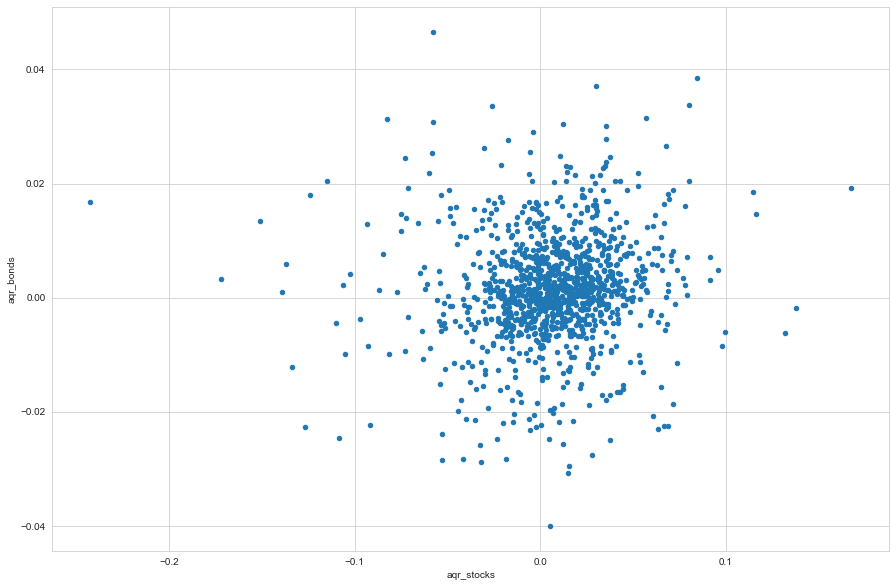

In [ ]:
data.plot.scatter("aqr_stocks", "aqr_bonds")

Investigation of Optimal Binning for Histogram Density Estimation
This example demonstrates the effect of different binning techniques on calculating Transfer Entropy using coupled 
random walks. The transition probablity of the walk follows a normal distribution, and hence we can calculate a theoretical
transfer entropy using the analytical solution to multivariate entropy. We use a slightly modified equation derived from 
Elements of Information Theory (Cover & Thomas) pp.230-231, which we use to calculate conditional entropy of the exogenous 
variable given its own past, conditioned with and without the side information of the endogenous variable.

In [ ]:
import matplotlib.pyplot as plt
import os

from PyCausality.Testing.Test_Utils.Time_Series_Generate import *
from PyCausality.TransferEntropy import *

## Set Parameters
LAG = 1
SIMILARITY = 0.9          # Choose value in range [0,1) (where  0 = independent and 1 = exact lagged value)
AUTOSIMILARITY = 0.1      # Choose value in range [0,1) (where  0 = independent and 1 = exact lagged value)
SEED = 10                 # Change pseudo-RNG seed; useful for repeat results & comparing bin choices
DATA_POINTS = 400

N_SHUFFLES = 25
N_OBSERVATIONS = 5
N_BINS = [3, 5, 7, 9, 11, 13, 15]
N_BINS = [5]

## Plot results
plt.style.use('seaborn')

ress = []

#for x, SIMILARITY in enumerate([0, 0.15, 0.5, 0.75]):
for x, SIMILARITY in enumerate([0.75]):

    for i in range(N_OBSERVATIONS):
        print('Random Walk #' + str(i))
        ## Generate coupled Gaussian Random Walks
        DF = coupled_random_walks(  
            S1 = 100, S2 = 100, T = 1, 
            N = DATA_POINTS, mu1 = 0, mu2 = 0, 
            sigma1 = 0.05, sigma2 = 0.05, 
            alpha = SIMILARITY, epsilon = AUTOSIMILARITY,
            lag = LAG, seed=SEED+i)
        ## For Gaussian-Distributed data, a scaled %-change with mu = 0
        DF = DF.pct_change().iloc[1:]
        
        DF["S2"] = DF["S2"] ** 2

        ## Calculate TE for different bins
        for j, n_bins in enumerate(N_BINS):
            print('bins:', n_bins)

            ## Initialise bins
            equal_bins = {
                'S1':              list(np.linspace(DF['S1'].min(), DF['S1'].max(), n_bins+1)),
                'S1_lag'+str(LAG): list(np.linspace(DF['S1'].min(), DF['S1'].max(), n_bins+1)),
                'S2':              list(np.linspace(DF['S2'].min(), DF['S2'].max(), n_bins+1)),
                'S2_lag'+str(LAG): list(np.linspace(DF['S2'].min(), DF['S2'].max(), n_bins+1)),
            }
            
            AB = AutoBins(df = DF[['S1','S2']], lag = LAG)
            #MIC_bins =  AB.MIC_bins(max_bins=n_bins)    # Note MIC_bins can have fewer bins than equal_bins
            MIC_bins =  AB.sigma_bins(max_bins=n_bins)    # Note MIC_bins can have fewer bins than equal_bins
            Sigma_bins = AB.sigma_bins(max_bins=n_bins)
            q_bins = {
                a: pd.qcut(DF[a], q=n_bins, retbins=True)[1]
                for a in DF
            }
            q_bins['S1_lag'+str(LAG)] = q_bins['S1']
            q_bins['S2_lag'+str(LAG)] = q_bins['S2']
            

            ## Initialise TE objects
            prm = dict(DF=DF, endog='S2', exog='S1', lag=LAG)
            causality_equal = TransferEntropy(**prm)
            causality_MIC = TransferEntropy(**prm)
            causality_Sigma = TransferEntropy(**prm)
            causality_q = TransferEntropy(**prm)
            
            ## Calculate TE & Store Significance Values
            prm = dict(pdf_estimator='histogram', n_shuffles=N_SHUFFLES)
            causality_MIC.nonlinear_TE(**prm, bins=MIC_bins)
            causality_equal.nonlinear_TE(**prm, bins=equal_bins)
            causality_Sigma.nonlinear_TE(**prm, bins=Sigma_bins)
            causality_q.nonlinear_TE(**prm, bins=q_bins)
            
            
            # Theoretical TE
            H1 = 0.5 * np.log( np.linalg.det(2* np.pi * np.e * np.cov(causality_equal.df[0].drop(columns=['S1']).values.T)) )      
            H2 = 0.5 * np.log( np.linalg.det(2* np.pi * np.e * np.cov(causality_equal.df[0].drop(columns=['S1','S2']).values.T)) )
            H3 = 0.5 * np.log( np.linalg.det(2* np.pi * np.e * np.cov(causality_equal.df[0].drop(columns=['S1','S1_lag'+str(LAG)]).values.T)) )
            H4 = 0.5 * np.log( 2 * np.pi * np.e * np.std(causality_equal.df[0]['S2_lag'+str(LAG)])**2)
            
            TE_XY_theo = (H3 - H4) - (H1 - H2)
            theo = 2 ** (np.log(TE_XY_theo) / np.log(2))    # Convert TE from 'Nats' to 'Bits'
            theo = pd.DataFrame([theo], index=[0], columns=["z_score_XY"])

            res = pd.concat([
                causality_equal.results, causality_MIC.results, causality_Sigma.results, causality_q.results, theo
            ], keys=[
                "equal", "mic", "sigma", "q", "theo"
            ], axis=0)
            res["obs"] = i
            res["n_bins"] = n_bins
            res["similarity"] = SIMILARITY
            
            ress += [res]
            
ress = pd.concat(ress)
ress.index = ress.index.droplevel(1).rename("binning")         

Random Walk #0
bins: 5


[0.6173755382129733, 0.17293029468693222]

[0.41178170801954805, 0.08202032283514926]

[0.6173755382129733, 0.17293029468693222]

[0.6717920639427497, 0.15540206425267478]

Random Walk #1
bins: 5


[0.6826134509310646, 0.15339468015738555]

[0.44886466478393094, 0.11783924596533923]

[0.6826134509310646, 0.15339468015738555]

[0.7309401919315706, 0.18442684860085823]

Random Walk #2
bins: 5


[0.6217968216470298, 0.12555124467926593]

[0.40354521186445047, 0.08699581411326429]

[0.6217968216470298, 0.12555124467926593]

[0.8009622142284236, 0.114937414350325]

Random Walk #3
bins: 5


[0.5737583157061052, 0.1366981647005856]

[0.2620501830582095, 0.04721838172318216]

[0.5737583157061052, 0.1366981647005856]

[0.712603875760581, 0.16930274166722636]

Random Walk #4
bins: 5


[0.679868388679636, 0.1224305627030633]

[0.40841911298674805, 0.06555955643841038]

[0.679868388679636, 0.1224305627030633]

[0.7336103634247682, 0.16779059546649844]

In [ ]:
ress_lin = ress.copy(True)

In [ ]:
ress_q.loc["q"]
ress_lin.loc["q"]

,TE_XY,TE_YX,p_value_XY,p_value_YX,z_score_XY,z_score_YX,Ave_TE_XY,Ave_TE_YX,obs,n_bins,similarity
binning,,,,,,,,,,,
q,0.671792,0.155402,0.0,0.72,16.251227,-0.618753,0.165319,0.169565,0,5,0.75
q,0.730940,0.184427,0.0,0.32,27.712241,0.512228,0.174743,0.171543,1,5,0.75
q,0.800962,0.114937,0.0,1.00,23.348026,-1.840878,0.163726,0.170958,2,5,0.75
q,0.712604,0.169303,0.0,0.44,16.400498,0.200034,0.163576,0.164196,3,5,0.75
q,0.733610,0.167791,0.0,0.44,24.410461,0.139806,0.169431,0.164832,4,5,0.75


,TE_XY,TE_YX,p_value_XY,p_value_YX,z_score_XY,z_score_YX,Ave_TE_XY,Ave_TE_YX,obs,n_bins,similarity
binning,,,,,,,,,,,
q,1.202919,0.155944,0.0,0.80,38.449284,-0.993518,0.165195,0.178738,0,5,0.75
q,1.249716,0.187180,0.0,0.36,48.802849,0.394877,0.167596,0.176457,1,5,0.75
q,1.316264,0.162384,0.0,0.52,58.142186,-0.131448,0.167684,0.165533,2,5,0.75
q,1.289495,0.148235,0.0,0.56,41.824533,-0.257010,0.168366,0.154639,3,5,0.75
q,1.267986,0.181025,0.0,0.12,40.871440,0.989015,0.169085,0.159277,4,5,0.75


<AxesSubplot:xlabel='n_bins'>

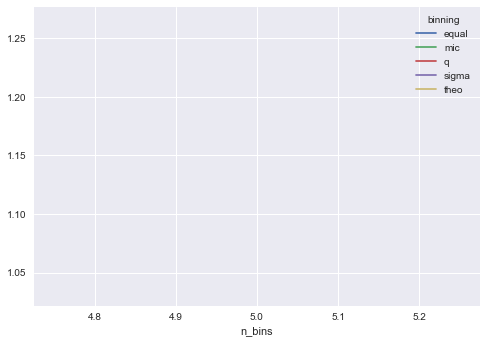

In [ ]:
ress.reset_index().groupby(["binning", "n_bins"]).TE_XY.mean().unstack("binning").plot()

In [ ]:
res = ress.set_index(["obs", "n_bins", "similarity"], append=True).stack().to_xarray().rename(level_4="value")
res

<xarray.DataArray (binning: 5, obs: 50, n_bins: 2, similarity: 1, value: 8)>
array([[[[[ 0.6915678 ,  0.02174968,  0.        , ..., -0.70717632,
            0.02246556,  0.02833575]],

         [[ 1.01157134,  0.13901214,  0.        , ...,  0.9022812 ,
            0.13586639,  0.12408153]]],


        [[[ 0.75840081,  0.01968847,  0.        , ..., -0.28990797,
            0.02291195,  0.0227521 ]],

         [[ 1.17606668,  0.15813579,  0.        , ...,  0.35156044,
            0.14123842,  0.15000203]]],


        [[[ 0.66792713,  0.02752988,  0.        , ...,  0.18769397,
            0.02492627,  0.02571194]],

         [[ 1.01431984,  0.122694  ,  0.        , ...,  0.52189827,
            0.12423572,  0.11367884]]],

...

        [[[        nan,         nan,         nan, ...,         nan,
                   nan,         nan]],

         [[        nan,         nan,         nan, ...,         nan,
                   nan,         nan]]],


        [[[        nan,         nan,         nan, ...,         nan,
                   nan,         nan]],

         [[        nan,         nan,         nan, ...,         nan,
                   nan,         nan]]],


        [[[        nan,         nan,         nan, ...,         nan,
                   nan,         nan]],

         [[        nan,         nan,         nan, ...,         nan,
                   nan,         nan]]]]])
Coordinates:
  * binning     (binning) object 'equal' 'mic' 'q' 'sigma' 'theo'
  * obs         (obs) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * n_bins      (n_bins) int64 3 5
  * similarity  (similarity) float64 0.75
  * value       (value) object 'TE_XY' 'TE_YX' ... 'Ave_TE_XY' 'Ave_TE_YX'

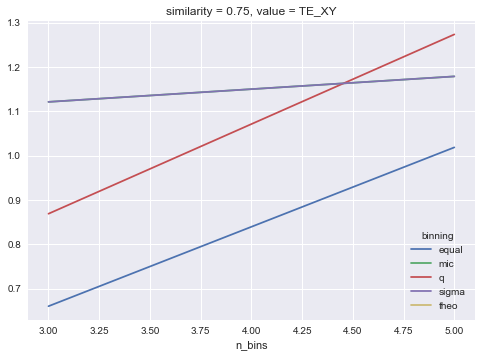

In [ ]:
res.mean("obs").sel(similarity=0.75, value="TE_XY").plot(x="n_bins", hue="binning")

,S2,S1,S2_lag1,S1_lag1
S2,1.000000,-0.067973,0.010578,-0.229675
S1,-0.067973,1.000000,-0.020135,0.036499
S2_lag1,0.010578,-0.020135,1.000000,-0.067708
S1_lag1,-0.229675,0.036499,-0.067708,1.000000


<AxesSubplot:xlabel='S1_lag1', ylabel='S2'>

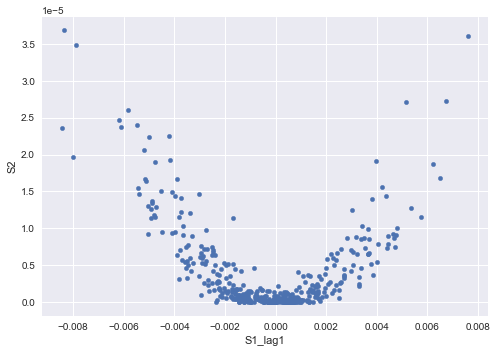

In [ ]:
a = causality_equal.df[0]
a.corr()
a.plot.scatter("S1_lag1", "S2")
sns.scatterplot(a.S2**0.5)

In [ ]:
a = causality_q.df[0]

In [ ]:
b = causality_q.bins

b = pd.DataFrame(
    [(a[c][:, None] > b[c][None, :]).sum(axis=1) - 1 for c  in a]
).T

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


,0,1,2,3
0,0,3,4,2
1,0,2,0,3
2,0,0,0,2
3,4,3,0,0
4,0,0,4,3
...,...,...,...,...
392,3,1,0,1
393,1,3,3,1
394,0,4,1,3
395,0,3,0,4
